# Exploratory Data Analysis: NYC Food Establishment Inspections

## Dataset Overview

This dataset contains detailed information on food establishment inspections conducted in various boroughs of New York City. It provides valuable insights into the cleanliness, compliance, and safety of food establishments, helping consumers make informed dining choices.

### Dataset Description

The dataset includes:
- **Unique identifiers**: CAMIS (unique identifier for each establishment)
- **Establishment information**: DBA (name), BORO (borough), address details (BUILDING, STREET, ZIPCODE), PHONE
- **Cuisine information**: CUISINE DESCRIPTION
- **Inspection details**: INSPECTION DATE, INSPECTION TYPE, ACTION
- **Violation information**: VIOLATION CODE, VIOLATION DESCRIPTION, CRITICAL FLAG
- **Inspection results**: SCORE, GRADE, GRADE DATE
- **Geographic data**: Latitude, Longitude, Community Board, Council District, Census Tract, BIN, BBL, NTA
- **Metadata**: RECORD DATE

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/NYC_Inspection_data.csv")

## 0. Features Meaning

| Feature Name | Description |
|--------------|-------------|
| **CAMIS** | Unique identifier for each establishment. |
| **DBA** | Name of the establishment. |
| **BORO** | The borough in which the establishment is located. |
| **BUILDING** | Building number/identifier in the address. |
| **STREET** | Street name in the address. |
| **ZIPCODE** | ZIP code of the establishment's location. |
| **PHONE** | Phone number of the establishment. |
| **CUISINE DESCRIPTION** | Type of cuisine served by the establishment. |
| **INSPECTION DATE** | Date of the most recent inspection. |
| **ACTION** | Result/outcome of the inspection. |
| **VIOLATION CODE** | Code for each violation found during the inspection. |
| **VIOLATION DESCRIPTION** | Description of each violation found during the inspection. |
| **CRITICAL FLAG** | Indicates whether the violation was critical or not. |
| **SCORE** | Establishment's score during the inspection. |
| **GRADE** | Establishment's letter grade (A, B, C, etc.). |
| **GRADE DATE** | Date of the establishment's most recent grade assignment. |
| **RECORD DATE** | Date on which the data was recorded. |
| **INSPECTION TYPE** | Type of inspection conducted. |
| **Latitude** | Latitude coordinate of the establishment's location. |
| **Longitude** | Longitude coordinate of the establishment's location. |
| **Community Board** | Community board code for geographic region. |
| **Council District** | City council district code. |
| **Census Tract** | Census tract identifier. |
| **BIN** | Building Identification Number. |
| **BBL** | Borough, Block, and Lot number. |
| **NTA** | Neighborhood Tabulation Area code. |

## 1. Basic Structure & Metadata
Understanding the dataset’s dimensions, columns, and data types.

In [54]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nSample of the data:")
display(df.head(3))
print("\nData types:")
print(df.dtypes)

Number of rows: 103426
Number of columns: 26

Sample of the data:


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41647571,PEKING GARDEN,Manhattan,3163,BROADWAY,10027,2128653600,Chinese,2/1/2022,Violations were cited in the following area(s).,...,5/14/2023,Cycle Inspection / Re-inspection,40.814647,-73.959057,109,7,21100,1059858,1019930092,MN09
1,50128737,BAO BY KAYA,Manhattan,570,LEXINGTON AVENUE,10022,9294219987,Asian/Asian Fusion,11/18/2022,Violations were cited in the following area(s).,...,5/14/2023,Pre-permit (Operational) / Re-inspection,40.756918,-73.972066,105,4,10000,1036459,1013050060,MN19
2,40510804,WOODROW DINER,Staten Island,655,ROSSVILLE AVENUE,10309,7186054031,American,3/5/2020,Violations were cited in the following area(s).,...,5/14/2023,Cycle Inspection / Re-inspection,40.542592,-74.208331,503,51,20801,5079747,5061450300,SI32



Data types:
CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                    int64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board           object
Council District          object
Census Tract              object
BIN                       object
BBL                       object
NTA                       object
dtype: object


## 2. Checking for Missing Data
Looking for any missing information in our dataset and checking if there are any duplicate records.

In [55]:
# Missing values
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print("Missing values per column (%):")
print(missing_pct[missing_pct > 0].round(2))

# Duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

Missing values per column (%):
GRADE DATE    13.63
BIN            0.53
SCORE          0.05
dtype: float64

Duplicate rows: 0


## 3. Basic Statistics
Calculating simple statistics like averages, minimums, and maximums for our data.

In [56]:
# Key numerical statistics
print("Key Statistics for SCORE:")
print(df['SCORE'].describe())

# Key categorical value counts
print("\nGrade Distribution:")
print(df['GRADE'].value_counts())
print("\nCritical Flag Distribution:")
print(df['CRITICAL FLAG'].value_counts())


Key Statistics for SCORE:
count    103376.000000
mean         17.753492
std          16.693250
min           0.000000
25%           9.000000
50%          12.000000
75%          21.000000
max         157.000000
Name: SCORE, dtype: float64

Grade Distribution:
GRADE
A         68421
B          9972
N          7058
Closed     7041
C          5210
Z          5167
P           557
Name: count, dtype: int64

Critical Flag Distribution:
CRITICAL FLAG
Critical          53951
Not Critical      49116
Not Applicable      359
Name: count, dtype: int64


## 4. Visualizations
Creating charts and graphs to better understand our data.


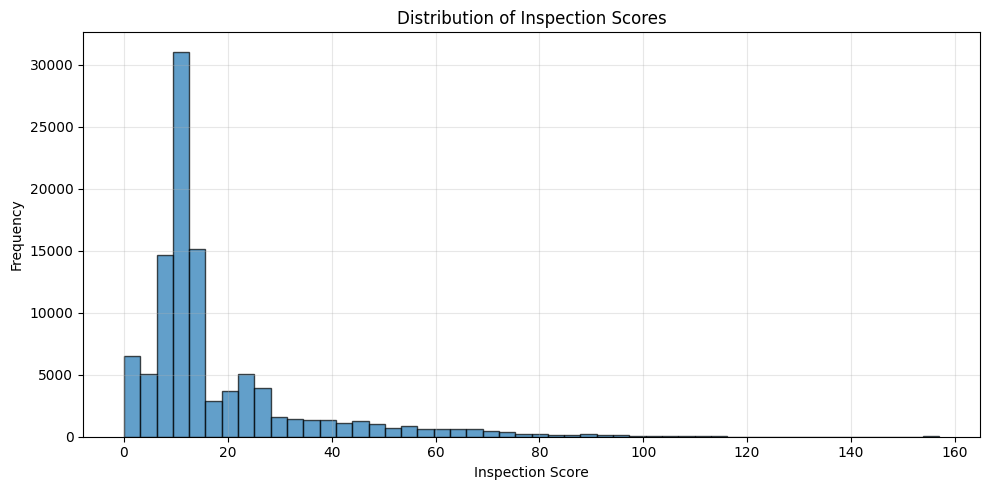

In [57]:
# Distribution of Inspection Scores
plt.figure(figsize=(10, 5))
df['SCORE'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Inspection Score')
plt.ylabel('Frequency')
plt.title('Distribution of Inspection Scores')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


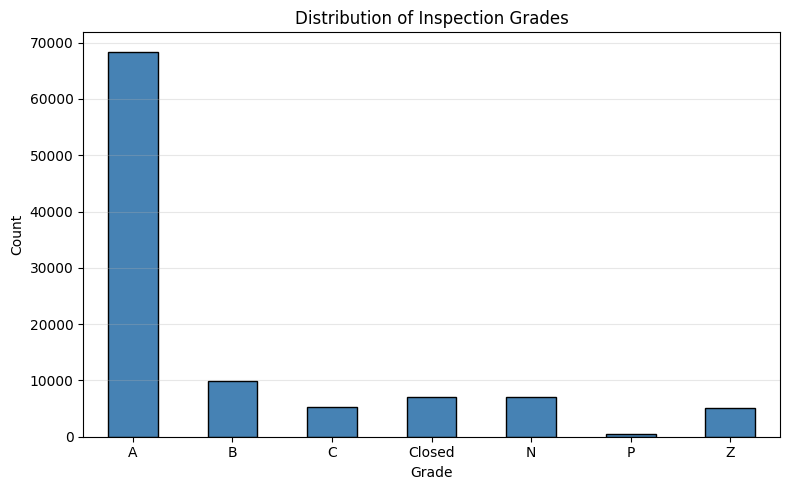

In [58]:
# Grade Distribution
grade_counts = df['GRADE'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
grade_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Inspection Grades')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [59]:
# Unique values in key categorical columns (for encoding decisions)
print("Unique value counts for key categorical features:")
print(f"  BORO: {df['BORO'].nunique()} unique values")
print(f"  CUISINE DESCRIPTION: {df['CUISINE DESCRIPTION'].nunique()} unique values")
print(f"  INSPECTION TYPE: {df['INSPECTION TYPE'].nunique()} unique values")
print(f"  CRITICAL FLAG: {df['CRITICAL FLAG'].nunique()} unique values")
print(f"  GRADE: {df['GRADE'].nunique()} unique values")


Unique value counts for key categorical features:
  BORO: 5 unique values
  CUISINE DESCRIPTION: 87 unique values
  INSPECTION TYPE: 22 unique values
  CRITICAL FLAG: 3 unique values
  GRADE: 7 unique values



Inspection Type Distribution:
INSPECTION TYPE
Cycle Inspection / Initial Inspection                          45230
Cycle Inspection / Re-inspection                               37349
Pre-permit (Operational) / Initial Inspection                   9970
Pre-permit (Operational) / Re-inspection                        7530
Cycle Inspection / Reopening Inspection                         1331
Pre-permit (Non-operational) / Initial Inspection                908
Pre-permit (Operational) / Reopening Inspection                  504
Pre-permit (Operational) / Compliance Inspection                 213
Cycle Inspection / Compliance Inspection                         126
Pre-permit (Non-operational) / Re-inspection                      84
Pre-permit (Operational) / Second Compliance Inspection           59
Inter-Agency Task Force / Initial Inspection                      58
Administrative Miscellaneous / Initial Inspection                 22
Administrative Miscellaneous / Reopening Inspection     

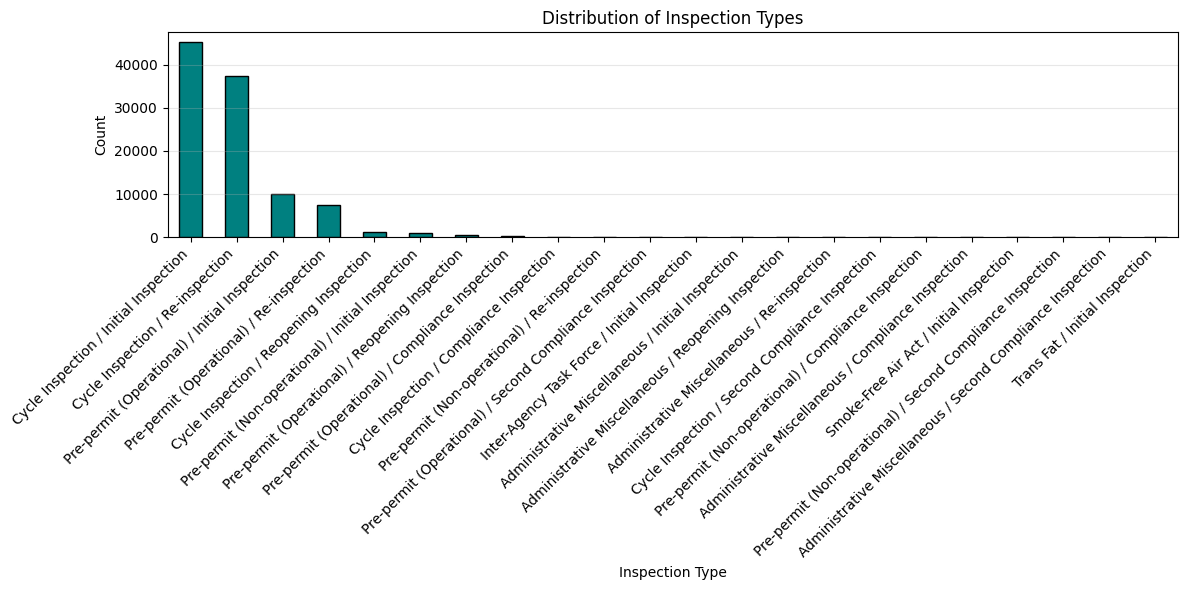

In [60]:
# --- 4.6 Inspection Type Analysis ---

inspection_type_counts = df['INSPECTION TYPE'].value_counts()
print("\nInspection Type Distribution:")
print(inspection_type_counts)
print(f"\nInspection Type Percentages:")
print((inspection_type_counts / len(df) * 100).round(2))

plt.figure(figsize=(12, 6))
inspection_type_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel('Inspection Type')
plt.ylabel('Count')
plt.title('Distribution of Inspection Types')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## 5. Correlation Analysis with GRADE
Analyzing relationships between features and GRADE to identify predictive features.


Correlation with GRADE (encoded as numeric):
SCORE          :  0.5768 (Strong)
Longitude      :  0.0469 (Weak)
ZIPCODE        :  0.0323 (Weak)
Latitude       :  0.0256 (Weak)


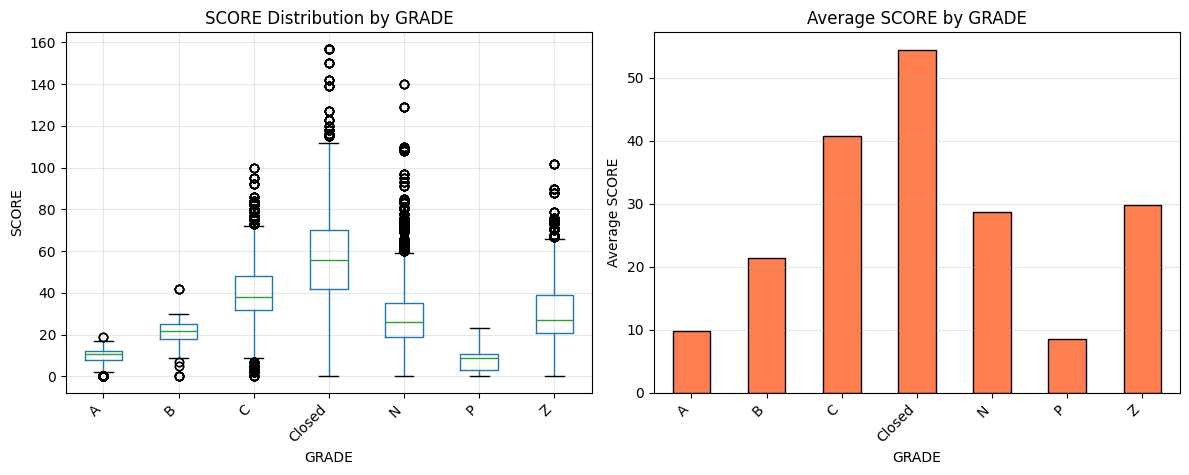

In [61]:
# 5.1 Numerical Features vs GRADE
# Encode GRADE as numeric for correlation (A=0, B=1, C=2, Closed=3, N=4, P=5, Z=6)
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'Closed': 3, 'N': 4, 'P': 5, 'Z': 6}
df['GRADE_NUM'] = df['GRADE'].map(grade_mapping)

# Calculate correlation between numerical features and GRADE
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove GRADE_NUM from the list if it's there, and focus on key numerical features
key_numeric = ['SCORE', 'ZIPCODE', 'Latitude', 'Longitude']

correlations = {}
for col in key_numeric:
    if col in df.columns:
        corr = df[col].corr(df['GRADE_NUM'])
        correlations[col] = corr

print("Correlation with GRADE (encoded as numeric):")
print("=" * 50)
for col, corr in sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{col:15s}: {corr:7.4f} ({'Strong' if abs(corr) > 0.5 else 'Moderate' if abs(corr) > 0.3 else 'Weak'})")

# Visualize SCORE vs GRADE (most important relationship)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot(column='SCORE', by='GRADE', ax=plt.gca())
plt.title('SCORE Distribution by GRADE')
plt.suptitle('')  # Remove default title
plt.xlabel('GRADE')
plt.ylabel('SCORE')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
avg_score_by_grade = df.groupby('GRADE')['SCORE'].mean().sort_index()
avg_score_by_grade.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average SCORE by GRADE')
plt.xlabel('GRADE')
plt.ylabel('Average SCORE')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


CRITICAL FLAG vs GRADE Crosstab:
GRADE               A      B     C  Closed     N     P      Z
CRITICAL FLAG                                                
Critical        59.54  11.83  6.31    8.58  7.93  0.32   5.48
Not Applicable  70.47   0.00  2.23    0.00  7.80  8.91  10.58
Not Critical    73.39   7.31  3.65    4.91  5.60  0.72   4.42


C:\Users\Hero\AppData\Local\Temp\ipykernel_27580\1312247663.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['FAILED'] = df_temp['GRADE'].isin(['C', 'Closed']).astype(int)


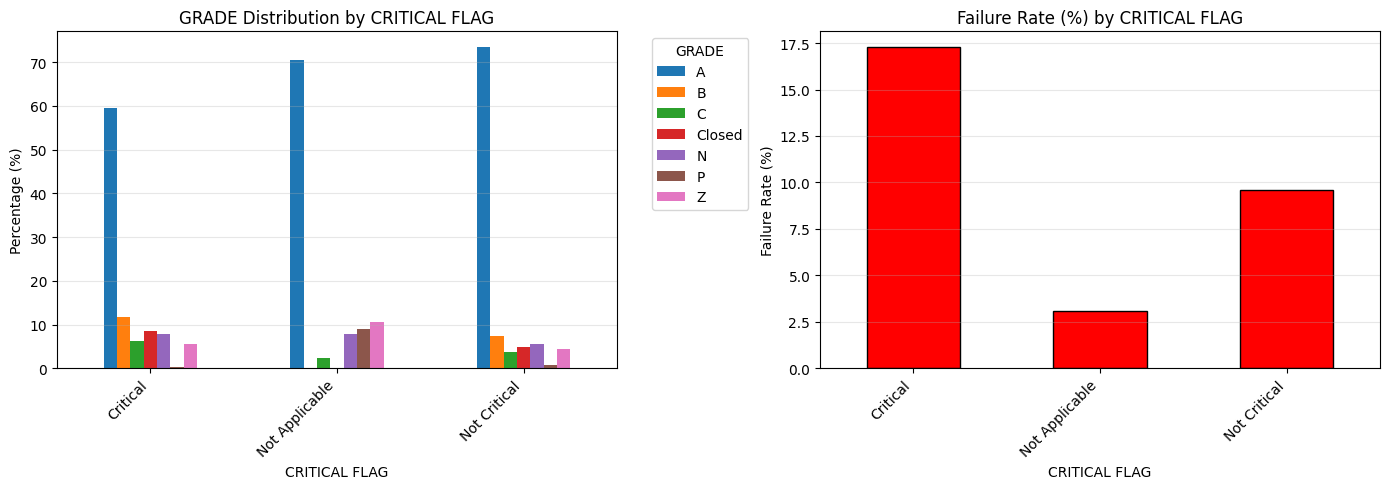

In [62]:
# 5.2 Categorical Features vs GRADE
# Analyze key categorical features

# CRITICAL FLAG vs GRADE
print("CRITICAL FLAG vs GRADE Crosstab:")
print("=" * 60)
critical_grade = pd.crosstab(df['CRITICAL FLAG'], df['GRADE'], normalize='index') * 100
print(critical_grade.round(2))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
critical_grade.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('GRADE Distribution by CRITICAL FLAG')
plt.xlabel('CRITICAL FLAG')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='GRADE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
# Calculate failure rate by CRITICAL FLAG
df_temp = df[df['GRADE'].isin(['A', 'B', 'C', 'Closed'])]
df_temp['FAILED'] = df_temp['GRADE'].isin(['C', 'Closed']).astype(int)
failure_by_flag = df_temp.groupby('CRITICAL FLAG')['FAILED'].mean() * 100
failure_by_flag.plot(kind='bar', color='red', edgecolor='black', ax=plt.gca())
plt.title('Failure Rate (%) by CRITICAL FLAG')
plt.xlabel('CRITICAL FLAG')
plt.ylabel('Failure Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



BORO vs GRADE Failure Rate:
BORO
Brooklyn         15.912700
Bronx            14.459459
Queens           13.994565
Manhattan        11.898681
Staten Island     6.596386
Name: FAILED, dtype: float64


C:\Users\Hero\AppData\Local\Temp\ipykernel_27580\1556622795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['FAILED'] = df_temp['GRADE'].isin(['C', 'Closed']).astype(int)


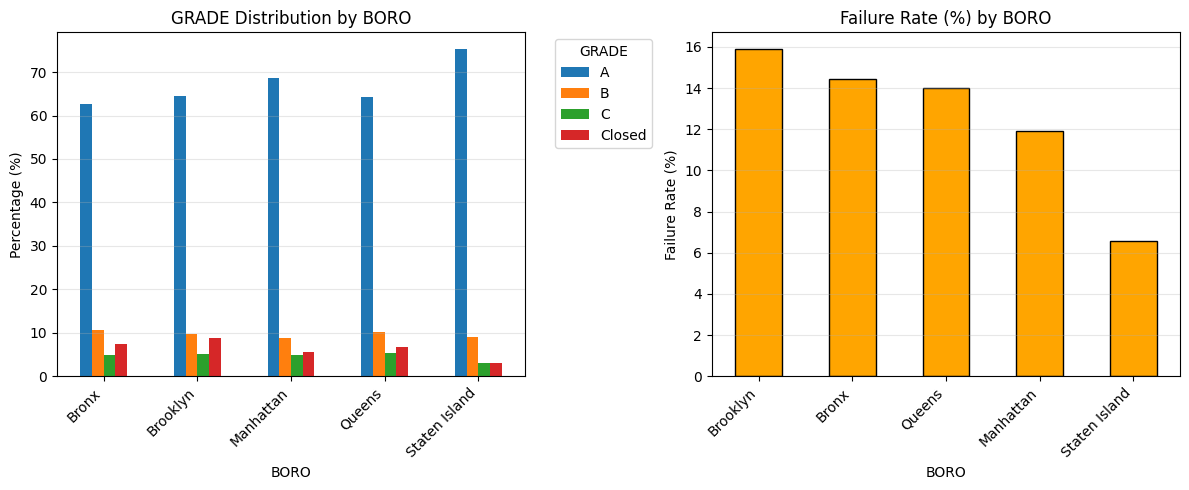

In [63]:
# BORO vs GRADE
print("\nBORO vs GRADE Failure Rate:")
print("=" * 60)
df_temp = df[df['GRADE'].isin(['A', 'B', 'C', 'Closed'])]
df_temp['FAILED'] = df_temp['GRADE'].isin(['C', 'Closed']).astype(int)
failure_by_boro = df_temp.groupby('BORO')['FAILED'].mean() * 100
print(failure_by_boro.sort_values(ascending=False))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
boro_grade = pd.crosstab(df['BORO'], df['GRADE'], normalize='index') * 100
boro_grade[['A', 'B', 'C', 'Closed']].plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('GRADE Distribution by BORO')
plt.xlabel('BORO')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='GRADE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
failure_by_boro.sort_values(ascending=False).plot(kind='bar', color='orange', edgecolor='black', ax=plt.gca())
plt.title('Failure Rate (%) by BORO')
plt.xlabel('BORO')
plt.ylabel('Failure Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


Top 10 Cuisines by Failure Rate:
CUISINE DESCRIPTION
Caribbean                   24.270253
Chinese                     21.787966
Bakery Products/Desserts    16.376812
Latin American              16.168027
Mexican                     14.993687
Pizza                       13.854352
Japanese                    11.870748
Italian                      8.675125
American                     7.851736
Coffee/Tea                   7.181018
Name: FAILED, dtype: float64


C:\Users\Hero\AppData\Local\Temp\ipykernel_27580\332180600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['FAILED'] = df_temp['GRADE'].isin(['C', 'Closed']).astype(int)


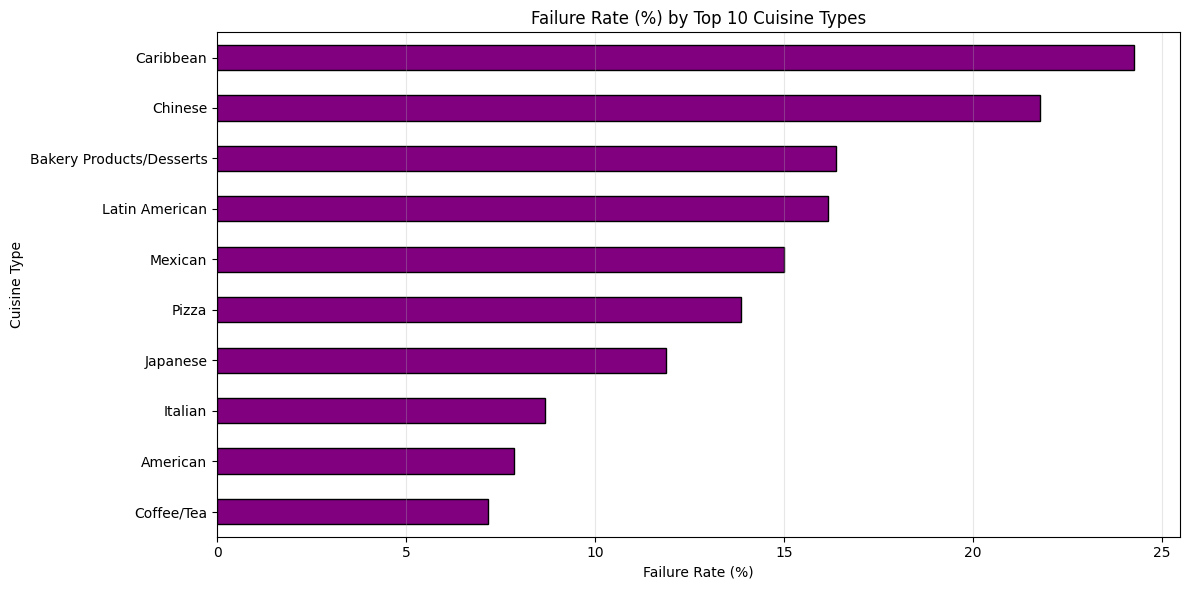

In [64]:
# CUISINE DESCRIPTION vs GRADE (Top 10 cuisines)
print("\nTop 10 Cuisines by Failure Rate:")
print("=" * 60)
df_temp = df[df['GRADE'].isin(['A', 'B', 'C', 'Closed'])]
df_temp['FAILED'] = df_temp['GRADE'].isin(['C', 'Closed']).astype(int)

# Get top 10 most common cuisines
top_cuisines = df['CUISINE DESCRIPTION'].value_counts().head(10).index
df_top = df_temp[df_temp['CUISINE DESCRIPTION'].isin(top_cuisines)]

failure_by_cuisine = df_top.groupby('CUISINE DESCRIPTION')['FAILED'].mean() * 100
print(failure_by_cuisine.sort_values(ascending=False))

plt.figure(figsize=(12, 6))
failure_by_cuisine.sort_values(ascending=True).plot(kind='barh', color='purple', edgecolor='black')
plt.title('Failure Rate (%) by Top 10 Cuisine Types')
plt.xlabel('Failure Rate (%)')
plt.ylabel('Cuisine Type')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()



Top Inspection Types by Failure Rate:


C:\Users\Hero\AppData\Local\Temp\ipykernel_27580\2235901545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['FAILED'] = df_temp['GRADE'].isin(['C', 'Closed']).astype(int)


INSPECTION TYPE
Cycle Inspection / Reopening Inspection          96.527778
Pre-permit (Operational) / Re-inspection         20.217775
Cycle Inspection / Re-inspection                 16.031690
Pre-permit (Operational) / Initial Inspection    12.404267
Cycle Inspection / Initial Inspection             8.897831
Name: FAILED, dtype: float64


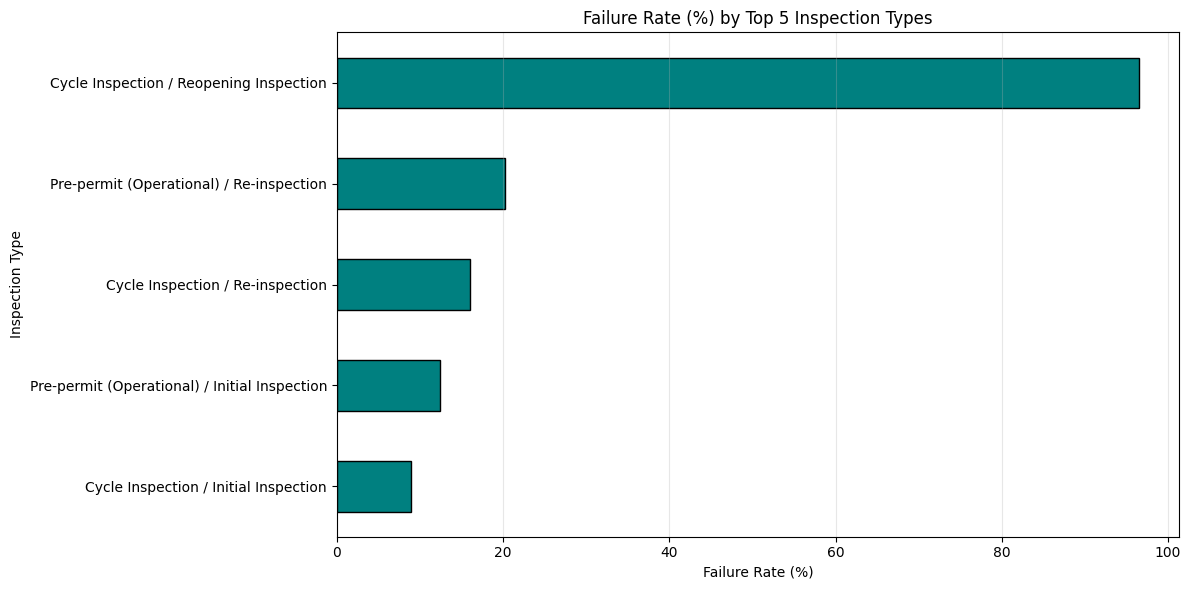

In [65]:
# INSPECTION TYPE vs GRADE (Top inspection types)
print("\nTop Inspection Types by Failure Rate:")
print("=" * 60)
df_temp = df[df['GRADE'].isin(['A', 'B', 'C', 'Closed'])]
df_temp['FAILED'] = df_temp['GRADE'].isin(['C', 'Closed']).astype(int)

# Get top 5 most common inspection types
top_inspections = df['INSPECTION TYPE'].value_counts().head(5).index
df_top = df_temp[df_temp['INSPECTION TYPE'].isin(top_inspections)]

failure_by_inspection = df_top.groupby('INSPECTION TYPE')['FAILED'].mean() * 100
print(failure_by_inspection.sort_values(ascending=False))

plt.figure(figsize=(12, 6))
failure_by_inspection.sort_values(ascending=True).plot(kind='barh', color='teal', edgecolor='black')
plt.title('Failure Rate (%) by Top 5 Inspection Types')
plt.xlabel('Failure Rate (%)')
plt.ylabel('Inspection Type')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [66]:
# Summary: Feature Importance for Predicting GRADE
print("\n" + "=" * 70)
print("SUMMARY: FEATURE IMPORTANCE FOR PREDICTING GRADE")
print("=" * 70)

print("\n1. NUMERICAL FEATURES (Correlation with GRADE):")
print("   - SCORE: Strongest predictor (higher score = worse grade)")
print(f"     Correlation: {correlations.get('SCORE', 0):.4f}")

print("\n2. CATEGORICAL FEATURES (Failure Rate Analysis):")
print("   - CRITICAL FLAG: Strong predictor")
print("     Critical violations → Higher failure rate")
print("   - BORO: Moderate predictor")
print("     Some boroughs have higher failure rates")
print("   - CUISINE DESCRIPTION: Moderate predictor")
print("     Certain cuisines have higher failure rates")
print("   - INSPECTION TYPE: Moderate predictor")
print("     Some inspection types correlate with outcomes")

print("\n3. KEY INSIGHTS:")
print("   - SCORE is the strongest predictor (direct relationship)")
print("   - CRITICAL FLAG is highly predictive")
print("   - Location (BORO) and CUISINE TYPE show patterns")
print("   - INSPECTION TYPE may indicate inspection context")

print("\n" + "=" * 70)



SUMMARY: FEATURE IMPORTANCE FOR PREDICTING GRADE

1. NUMERICAL FEATURES (Correlation with GRADE):
   - SCORE: Strongest predictor (higher score = worse grade)
     Correlation: 0.5768

2. CATEGORICAL FEATURES (Failure Rate Analysis):
   - CRITICAL FLAG: Strong predictor
     Critical violations → Higher failure rate
   - BORO: Moderate predictor
     Some boroughs have higher failure rates
   - CUISINE DESCRIPTION: Moderate predictor
     Certain cuisines have higher failure rates
   - INSPECTION TYPE: Moderate predictor
     Some inspection types correlate with outcomes

3. KEY INSIGHTS:
   - SCORE is the strongest predictor (direct relationship)
   - CRITICAL FLAG is highly predictive
   - Location (BORO) and CUISINE TYPE show patterns
   - INSPECTION TYPE may indicate inspection context

